<a href="https://colab.research.google.com/github/willisg25/Stat24/blob/main/Willis_Final_Project_Notebook_Stats_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook - Spring 2024

In [ ]:
import matplotlib.pyplot as plt
import imageio
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from torchvision.models import *
from PIL import Image
import requests
from torchvision import models
from torchsummary import summary

In [ ]:
def plot(x):#Define a function called 'plot' which takes one argument 'x'. This argument is an image array.
    fig, ax = plt.subplots()#Create a figure and a set of subplots. This will return a Figure (fig) and an Axes object (ax). The Axes object is where we can plot our image.
    im = ax.imshow(x,cmap='gray') # Display an image, i.e., data on a 2D regular raster, on the created Axes object. The colormap 'gray' is used to plot the image in grayscale
    ax.axis('off') #Turn off the axes on the image.
    fig.set_size_inches(20, 20) #Set the figure size to 20 by 20 inches for a large display of the image.
    plt.show()  #Display image

In [ ]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png') #Import the imageio library function to read an image from a URL.

In [ ]:
plot(im)

In [ ]:
net = alexnet(pretrained=True).cuda(0) #A call to a high-level API that loads a pre-trained model called AlexNet. AlexNet is a convolutional neural network that is widely used in image recognition.

In [ ]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],#Mean values for normalization of the Red, Green, and Blue channels.
   std=[0.229, 0.224, 0.225] #Standard deviation values for normalization of the Red, Green, and Blue channels.
)
preprocess = transforms.Compose([
   transforms.Resize(256), #Resize the input image to 256x256 pixels.
   transforms.CenterCrop(224), #Crop the center part of the image to have a 224x224 resolution.
   transforms.ToTensor(), #Convert the image to a tensor, which is a multi-dimensional array
   normalize #Apply the normalization transformation defined above.
])

In [ ]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg') #Import the imageio library function to read an image from a URL.

In [ ]:
plot(im)

In [ ]:
image = Image.fromarray(im) #convert to Python Imaging Library.

In [ ]:
img_tensor = preprocess(image) #Apply the predefined preprocessing pipeline to the image. This includes resizing, center cropping, converting to tensor, and normalizing.

In [ ]:
img_tensor = img_tensor.unsqueeze_(0) # Add an extra dimension at the beginning of the tensor to account for batch size.
# Neural networks expect a batch dimension as the first dimension of the input tensor.

The unsqueeze(0) operation is a tensor reshaping operation that adds a dimension, which is a basic operation in linear algebra to match the tensor dimensions to the model requirements.

In [ ]:
img_tensor.shape #Retrieve the shape of the tensor.

In [ ]:
img_variable = torch.tensor(img_tensor).cuda(0) #Convert the tensor to be compatible with CUDA (for GPU acceleration) if CUDA is available.
#This line is moving the tensor to GPU memory to utilize GPU for computation.

In [ ]:
out = net(img_variable) #Pass the tensor through the network to get the output. This is the forward pass, where the network makes a prediction based on the input image.

This is the application of a series of linear and nonlinear transformations (the neural network layers) that map the input data to the output prediction. The transformations include matrix multiplications, convolutions, activations (like ReLU), pooling, and fully connected layers.

In [ ]:
label_index = out.cpu().data.numpy().argmax() #Move the network output back to the CPU and convert it to a numpy array. Then use argmax to find the index of the highest value in the output tensor, which corresponds to the predicted class label.

This is an operation from optimization and linear algebra used to find the argument (index) of the maximum value in a vector. In this context, it is used to determine the most likely class label according to the model.

In [ ]:
label_index #Display the predicted class label index.

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:]) #Get the indices of the top predictions from the output. The flip function is used to sort the probabilities in descending order, and argsort provides the indices of the values in this order. We then take the top 10.

The use of np.argsort and np.flip functions are standard operations from computational mathematics used to sort data and manipulate arrays.

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json' #Define the URL where the label indices and their corresponding names can be found.

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}
#Fetch the JSON file containing the labels from the defined URL and convert it to a Python dictionary.
#The dictionary keys are converted to integers for indexing purposes.
#'requests.get().json()' makes an HTTP GET request to the LABELS_URL and decodes the JSON response into a dictionary.

In [ ]:
print(labels[label_index]) #Print the name of the label corresponding to the 'label_index' determined earlier by the 'argmax()' function.
#This shows the most likely classification of the image by the neural network.

In [ ]:
for i in range(10):
    print(labels[top_list[i]])
#Loop over the top 10 indices in 'top_list' which contains the indices of the top predictions from the network.
#Print the label names corresponding to these indices. This shows the top 10 classifications predicted by the network.

In [ ]:
net #Shows the structure of the Alexnet model.

In [ ]:
summary(net, (3, 224, 224)) #The `summary` function will then output a table summarizing the layers of the model, including layer types, output shapes, and the number of parameters (weights and biases) in each layer. This function helps to understand the model's structure andto estimate the computational complexity and memory requirements.

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()
#'out' is the variable where we store the output of the operation.
#'net.features[0]' accesses the first layer of the 'features' submodule of the AlexNet model 'net'.
#The 'features' submodule typically contains the convolutional layers of the network.
#By indexing with [0], we select the very first convolutional layer in the network.

In [ ]:
plot(out[0,0,:,:])

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
#np.arange(4096) creates an array of 4096 numbers from 0 to 4095, which will serve as the x-axis of the plot.
#net.classifier[0:6] takes the first six layers of the classifier part of the AlexNet network.
#net.avgpool(net.features[0:13](img_variable)) passes the 'img_variable' through the first thirteen layers of the features part of the network, and then through the average pooling layer.
#The output of the avgpool is then flattened into a one-dimensional tensor to be compatible with the classifier layers.
#The classifier layers are then applied to this flattened tensor.
#The '.cpu().detach().numpy()' part moves the tensor back to CPU memory, detaches it from the current graph.
#This array is then plotted against the generated range of numbers.
fig = plt.gcf() #plt.gcf() gets the current figure.
fig.set_size_inches(10, 10) #Sets tthe size in inces of the figure.

In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')#Import the imageio library function to read an image from a URL.

In [ ]:
plot(im)

In [ ]:
def load_im(im): #Load and preprocess the image
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image) #Apply the preprocessing pipeline to the pil image.
    img_tensor = img_tensor.unsqueeze_(0) #Unsqueeze the image tensor to add a batch dimension. Neural networks expect inputs with a batch dimension, even if it's just one image (batch size = 1).
    img_variable = torch.tensor(img_tensor).cuda(0) #Move the image tensor to GPU device 0 for faster computation if a GPU is available.
    return img_variable

In [ ]:
out = net(load_im(im)) #Runs the load_im function and passes the result to the neural network.

In [ ]:
def inference(im): #Function for running inference on an image using the trained neural network.
    out = net(load_im(im)) #Run the loaded and preprocessed image through the network to get the output.
    label_index = out.cpu().data.numpy().argmax() #Transfer the output tensor to CPU memory, convert it to a numpy array, and then use the argmax function to find the index of the maximum value, which corresponds to the predicted class label.
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:]) #Flip the probabilities in descending order and retrieve the top 10 indices using argsort.
    print(labels[label_index]) #Print the label corresponding to the predicted class index.
    print('____') #Print a newline for better readability.
    for i in range(10): #Loop over the top 10 predictions and print their corresponding labels.
        print(labels[top_list[i]])

In [ ]:
inference(im) #Run inference on im.

# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data): #Function that moves data to the GPU and allows gradient computation on the tensor.
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data): #Function that moves data to the GPU without enabling gradient computation.
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    fig, ax = plt.subplots() #Create a new matplotlib figure and axes.
    im = ax.imshow(x, cmap = 'gray') #Display the image 'x' in grayscale on the axes.
    ax.axis('off') #Axes off.
    fig.set_size_inches(5, 5) #Set the figure size to 5 by 5 inches.
    plt.show() #Display image

In [ ]:
def get_google_slide(url): #This function is used to automate the process of generating a downloadable URL for Google Slides.
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5] #Extract the unique identifier of the Google Slide from the provided URL.
    page_id = url.split('.')[-1] #Extract the page ID from the provided URL.
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #Return the complete URL for downloading the specified page of the Google Slide as a PDF.

def get_slides(url):
    url = get_google_slide(url) #Get the full URL for the Google Slide to be downloaded.
    r = requests.get(url, allow_redirects=True) #Make an HTTP GET request to fetch the slide.
    open('file.pdf', 'wb').write(r.content) #Write the content of the response (the PDF file) to a local file named 'file.pdf'.
    images = convert_from_path('file.pdf', 500) #Convert the PDF file to a series of images.
    return images

def load(image):
#Function to apply transformations to an image and ensure it is ready for model input.
    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #Use GPU if available else use CPU.

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
#Fetch the class labels from a remote JSON file hosted on Amazon AWS and parse them.
#Convert the JSON object keys to integers for indexing and values to their corresponding class names.
#The resulting 'labels' dictionary will be used to map prediction indices to human-readable class labels.

In [ ]:
model = alexnet(weights='DEFAULT').to(device) #Load a pre-trained AlexNet model from PyTorch's model zoo and move to either GPU or CPU.
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1arvQWGjVtL_qil_4qP3rnUecTmPB9oXa6-gd_guAOhM/edit#slide=id.g19b8867b70f_0_173"

In [ ]:
images = [] #Initialize an empty list to store images that will be downloaded and processed.

for image in get_slides(url): #Download the slides from the provided Google Slides URL and process each slide.

    plot(image)

    images.append(load(image)) #Apply transformations to the image and append the processed image to the 'images' list.
    #The 'load' function likely applies model-specific preprocessing such as resizing, normalization, and conversion to a tensor format required for input into the neural network.

images = torch.vstack(images) #Stack the list of processed image tensors into a single tensor along a new dimension (batch dimension).

In [ ]:
images.shape #Retrieve and print the shape of the 'images' tensor.

In [ ]:
model(images) #Pass the batch of images through the pre-trained model to obtain the raw predictions.

In [ ]:
y = model(images) #Assign the output of the model predictions to the variable 'y'.

In [ ]:
y.shape #Retrieve and print the shape of the 'y' tensor.

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()
#Use 'torch.argmax' to find the predicted class index with the highest logit value for each image.
#The 'argmax' operation is performed along dimension 1 (the class dimension).
#The result is moved to CPU memory from GPU and then converted to a numpy array for easy manipulation.

In [ ]:
for i in list(guesses): #Iterate over each predicted class index in 'guesses' and print the corresponding label from the 'labels' dictionary.
    print(labels[i])

In [ ]:
Y = np.zeros(50,) #Create a NumPy array 'Y' of zeros with a length of 50.
Y[25:] = 1 #Set the value of the 26th element in the 'Y' array to 1

In [ ]:
Y #Print Y.

In [ ]:
X = y.detach().cpu().numpy() #Detach 'y' from the current computation graph (so no gradients are computed), move it to CPU memory (in case it was on a GPU), and convert it to a NumPy array.

In [ ]:
X.shape #Display the shape of X.

In [ ]:
plt.plot(X[0],'.') #Creates a graph using essensially a scatterplot.

In [ ]:
X[0]

In [ ]:
np.argmax(X[0]) #Use np.argmax to find the index of the maximum value in the first row of the array 'X'.
# This operation assumes 'X' contains model predictions for a single image, where each element corresponds to the prediction score of a class.

In [ ]:
labels[948] #Access label number 948 and print.

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]
# Calculate the indices that would sort the first row of 'X' in ascending order, then reverse the array to get descending order and take the first 10 elements.

In [ ]:
for i in top_ten: #Iterate over each index in 'top_ten' and print the corresponding label from the 'labels' dictionary.
    print(labels[i])

In [ ]:
labels #Print the lables from the dictionary.

In [ ]:
plt.hist(X[0]) #Plot the histogram of current X[0].

In [ ]:
X = GPU_data(X) #Moves the tensor 'X' to the GPU if available and sets it not to calculate gradients.
Y = GPU_data(Y) #Moves the tensor 'Y' to the GPU if available and sets it not to calculate gradients.

In [ ]:
def softmax(x): #Define a softmax function which is applied to neural network outputs to obtain probability distributions over classes.
    s1 = torch.exp(x - torch.max(x,1)[0][:,None]) #Calculate the exponential of each element minus the max value across each row.
    s = s1 / s1.sum(1)[:,None]  #Divide each row by the sum of its exponentials to get probabilities that sum to 1 across each row.
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

#Apply the softmax to the outputs and then the logarithm.
#Use advanced indexing to select the log probabilities of the true classes and divide by the batch size.
#The negative sum of these values is the cross-entropy loss.

In [ ]:
def Truncated_Normal(size):
 #Generate two uniform random samples.
    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2) #Apply the inverse CDF of the normal distribution (Box-Muller transform).

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad(): #Temporarily disable gradient calculation to save memory and computations since it's not needed for accuracy calculation.
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0] #Compare the argmax of the predictions with the true labels and compute the mean.

In [ ]:
X.shape

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":  #Check if fetching training data.
        r = np.random.randint(X.shape[0]-b) #Randomly choose a start index 'r' for the batch.
        x = X[r:r+b,:] #Slice the 'X' array to get 'b' samples starting from index 'r'.
        y = Y[r:r+b] #Slice the 'Y' array to get corresponding labels.
    elif mode == "test": #Check if we are fetching testing data.
        r = np.random.randint(X_test.shape[0]-b) #Randomly choose a start index 'r' for the batch from the test set.
        x = X_test[r:r+b,:] #Slice the 'X_test' array to get 'b' samples.
        y = Y_test[r:r+b] #Slice the 'Y_test' array to get corresponding labels.
    return x,y

In [ ]:
def model(x,w): #Function that defines the model's prediction mechanism.

    return x@w[0] #matrix multiplication of 'x' with 'w' to produce the output predictions.

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y) #Calculate accuracy on the training set using the 'acc' function.

    wb.log({"acc_train": acc_train}) #Log the training accuracy to Weights & Biases.

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #Initialize a Weights & Biases project for experiment tracking.
c = wb.config #Assign a configuration object from Weights & Biases to 'c' for easy access to hyperparameters.

c.h = 0.001 #Set the learning rate hyperparameter.
c.b = 4 #Set the batch size hyperparameter.
c.epochs = 100000 #Set the number of epochs for training.

w = [GPU(Truncated_Normal((1000,2)))]
#Initialize model weights 'w' with values sampled from a truncated normal distribution.
#The 'GPU' function moves the weights tensor to the GPU.
#The size of the tensor corresponds to the number of features (1000) and number of classes (2).

optimizer = torch.optim.Adam(w, lr=c.h) #Initialize the optimizer to use the Adam optimization algorithm with the model weights and learning rate.

for i in range(c.epochs): #Start a training loop that will run for the number of epochs specified.

    x,y = get_batch('train') #Get a batch of training data: 'x' for inputs and 'y' for targets.

    loss = cross_entropy(softmax(model(x,w)),y) #Calculate the loss for the current batch.

    optimizer.zero_grad() #Zero the gradients before running the backward pass.
    loss.backward() #Perform a backward pass to calculate the gradients.
    optimizer.step() #Update the weights based on the calculated gradients.

    wb.log({"loss": loss}) #Log the current loss value to Weights & Biases.

    make_plots() #Call a function to create and log plots in Weights & Biases.


![projg1.PNG](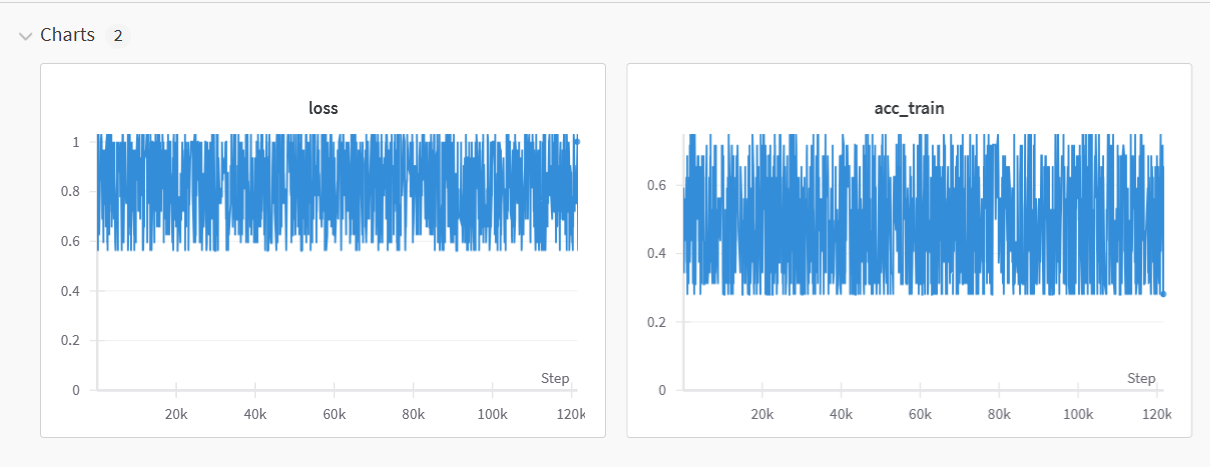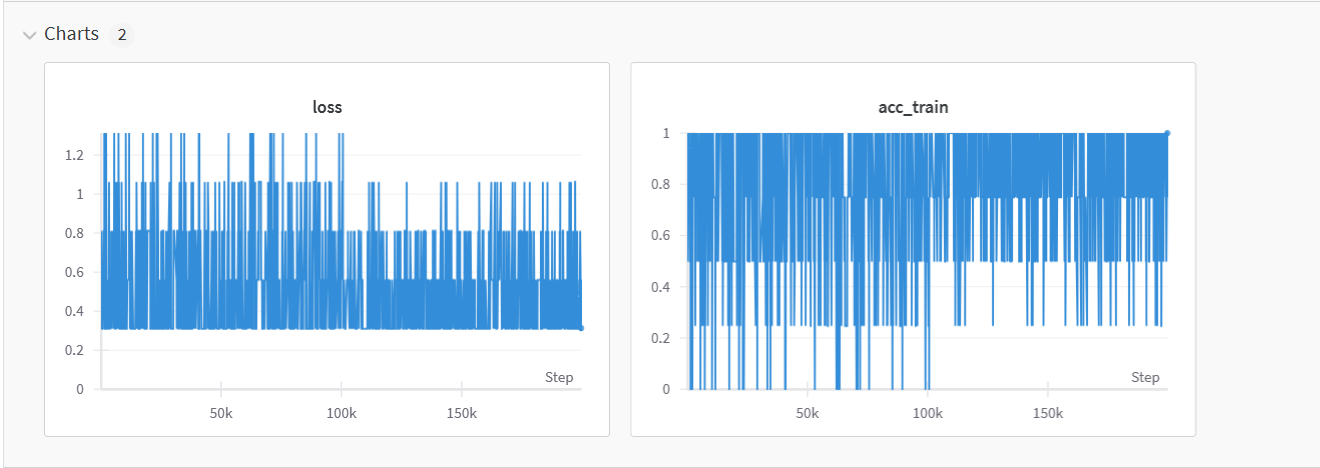)